

\

# Predicting Medical Insurance Expenses using Logistic Regression

https://www.kaggle.com/noordeen/insurance-premium-prediction?select=insurance.csv

In [ ]:
import pandas as pd
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance[['sex','smoker','region']].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
# Replacing string values to numbers
insurance['sex'] = insurance['sex'].apply({'male':0,'female':1}.get) 
insurance['smoker'] = insurance['smoker'].apply({'yes':1,'no':0}.get)
insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,3,21984.47
4,32,0,28.9,0,0,3,3866.86


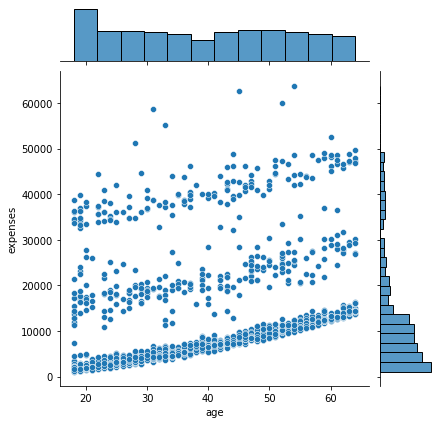

In [ ]:
import seaborn as sns
# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=insurance['age'],y=insurance['expenses'])

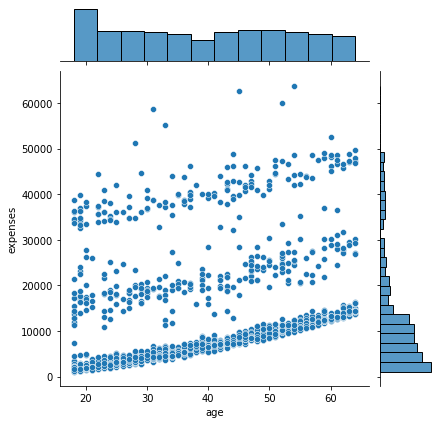

In [ ]:
# Correlation betweeen 'charges' and 'smoker' 
sns.jointplot(x=insurance['age'],y=insurance['expenses'])

In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
# features
X = insurance[['age', 'sex', 'bmi', 'children','smoker','region']]
# predicted variable
y = insurance['expenses']

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.9,0,1,1
1,18,0,33.8,1,0,2
2,28,0,33.0,3,0,2
3,33,0,22.7,0,0,3
4,32,0,28.9,0,0,3


In [ ]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [ ]:
# importing train_test_split model
from sklearn.model_selection import train_test_split
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
print(len(X_test),len(X_train),len(insurance) )

536 802 1338


In [ ]:
# importing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit linear model by passing training dataset
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the target variable for test datset
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

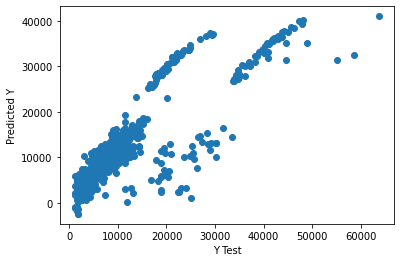

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

##Predicting the insurance expenses for 5 newly created samples

In [ ]:
# Predicting expenses- trail 1
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 45.50,
        'children' : 4,
        'smoker' : 1,
        'region' : 3}
index = [1]
trail01 = pd.DataFrame(data,index)
trail01

,age,sex,bmi,children,smoker,region
1,40,1,45.5,4,1,3


In [ ]:
prediction_trail01 = model.predict(trail01)
print("Medical Insurance cost for Trail-1 is : ",prediction_trail01)

Medical Insurance cost for Trail-1 is :  [38744.31844195]


In [ ]:
# Predicting expenses- trail 2
data = {'age' : 32,
        'sex' : 1,
        'bmi' : 49.80,
        'children' : 2,
        'smoker' : 1,
        'region' : 2}
index = [1]
trail02 = pd.DataFrame(data,index)
trail02

,age,sex,bmi,children,smoker,region
1,32,1,49.8,2,1,2


In [ ]:
prediction_trail02 = model.predict(trail02)
print("Medical Insurance cost for Trail-2 is : ",prediction_trail02)

Medical Insurance cost for Trail-2 is :  [36955.96598203]


In [ ]:
# Predicting expenses- trail 3
data = {'age' : 46,
        'sex' : 1,
        'bmi' : 53.90,
        'children' : 3,
        'smoker' : 0,
        'region' : 4}
index = [1]
trail03 = pd.DataFrame(data,index)
trail03

,age,sex,bmi,children,smoker,region
1,46,1,53.9,3,0,4


In [ ]:
prediction_trail03 = model.predict(trail03)
print("Medical Insurance cost for Trail-3 is : ",prediction_trail03)

Medical Insurance cost for Trail-3 is :  [19016.13004591]


In [ ]:
# Predicting expenses- trail 4
data = {'age' : 38,
        'sex' : 0,
        'bmi' : 42.30,
        'children' : 1,
        'smoker' : 0,
        'region' : 1}
index = [1]
trail04 = pd.DataFrame(data,index)
trail04

,age,sex,bmi,children,smoker,region
1,38,0,42.3,1,0,1


In [ ]:
prediction_trail04 = model.predict(trail04)
print("Medical Insurance cost for Trail-4 is : ",prediction_trail04)

Medical Insurance cost for Trail-4 is :  [11886.67966962]


In [ ]:
# Predicting expenses- trail 5
data = {'age' : 43,
        'sex' : 1,
        'bmi' : 56.90,
        'children' : 3,
        'smoker' : 1,
        'region' : 3}
index = [1]
trail05 = pd.DataFrame(data,index)
trail05

,age,sex,bmi,children,smoker,region
1,43,1,56.9,3,1,3


In [ ]:
prediction_trail05 = model.predict(trail05)
print("Medical Insurance cost for Trail-5 is : ",prediction_trail05)

Medical Insurance cost for Trail-5 is :  [42947.62313889]


In [ ]:
import pickle
m="m.pkl"
with open(m, 'wb') as file:  
    pickle.dump(model, file)